In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
#plt.style.use('default')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd

In [13]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
#SQLAlchemy Create Engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [17]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

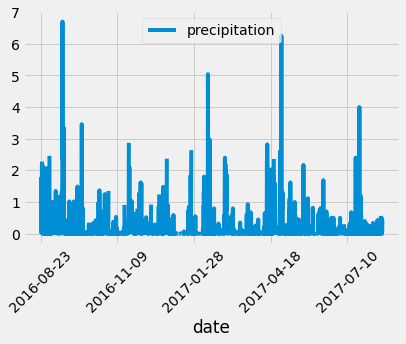

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results2 =[]
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results2 = session.query(Measurement.tobs).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=45)
plt.xticks()
plt.show()

In [21]:
print(results2)

[(81.0,), (79.0,), (80.0,), (79.0,), (77.0,), (78.0,), (78.0,), (79.0,), (80.0,), (81.0,), (80.0,), (79.0,), (75.0,), (79.0,), (76.0,), (76.0,), (80.0,), (79.0,), (78.0,), (76.0,), (78.0,), (78.0,), (75.0,), (79.0,), (80.0,), (79.0,), (81.0,), (77.0,), (77.0,), (78.0,), (76.0,), (82.0,), (81.0,), (78.0,), (80.0,), (80.0,), (79.0,), (80.0,), (80.0,), (80.0,), (79.0,), (79.0,), (79.0,), (80.0,), (80.0,), (79.0,), (78.0,), (76.0,), (75.0,), (80.0,), (80.0,), (79.0,), (80.0,), (79.0,), (78.0,), (78.0,), (80.0,), (81.0,), (79.0,), (77.0,), (79.0,), (78.0,), (77.0,), (77.0,), (78.0,), (77.0,), (78.0,), (77.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (71.0,), (71.0,), (71.0,), (71.0,), (72.0,), (71.0,), (72.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (75.0,), (76.0,), (76.0,), (75.0,), (72.0,), (74.0,), (75.0,), (73.0,), (76.0,), (75.0,), (68.0,), (75.0,), (75.0,), (72.0,), (69.0,), (71.0,), (68.0,), (67.0,), (69.0,), (73.0,), (70.0,), (70.0,), (70.0,), 

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [24]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [42]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station)).all()

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [46]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb655c7c950>,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08}

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [57]:
df = pd.DataFrame(results, columns=['tobs'])

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


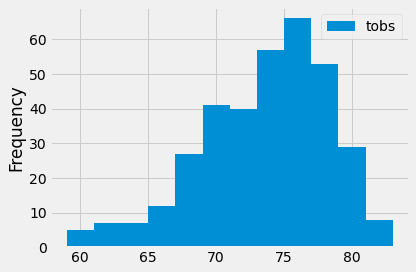

In [59]:
print(df)
df.plot.hist(bins=12)
plt.tight_layout()

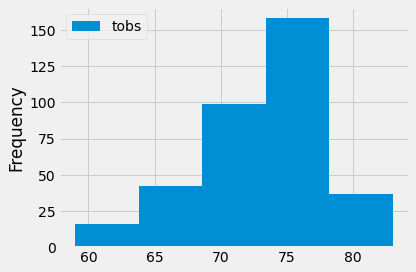

In [61]:
df.plot.hist(bins=5)
plt.tight_layout()

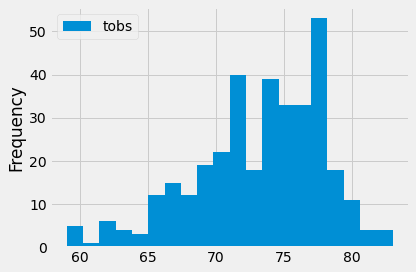

In [62]:
df.plot.hist(bins=20)
plt.tight_layout()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge